In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load_data

In [116]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d3f46fe6b41b1d69ce184c4d234bd06cb6c9ff139b055a2ecbd21042b4d386fa
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [130]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [175]:
test_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/test.tsv", delimiter="\t")
test_osaka_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/test_local_osaka3.tsv", delimiter="\t")
test_tokyo_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/test_local_tokyo.tsv", delimiter="\t")

In [63]:
# group3_vesion_results
test_group3_rslt_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/group3_vesion/p.csv", delimiter="\t", header=None)
osaka_group3_rslt_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/group3_vesion/q.csv", delimiter="\t", header=None)
tokyo_group3_rslt_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/group3_vesion/tokyo.csv", header=None).iloc[:, -1]

test_group3_rslt = np.array(test_group3_rslt_df).reshape(-1)
osaka_group3_rslt = np.array(osaka_group3_rslt_df).reshape(-1)
tokyo_group3_rslt = np.array(tokyo_group3_rslt_df)

In [176]:
train_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/train.tsv", delimiter="\t")

In [64]:
# group5_origin_results
test_group5_rslt_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/group5_origin/p.csv", delimiter="\t", header=None)
osaka_group5_rslt_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/group5_origin/q.csv", delimiter="\t", header=None)
tokyo_group5_rslt_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/group5_origin/tokyo.csv", header=None).iloc[:, -1]

test_group5_rslt = np.array(test_group5_rslt_df).reshape(-1)
osaka_group5_rslt = np.array(osaka_group5_rslt_df).reshape(-1)
tokyo_group5_rslt = np.array(tokyo_group5_rslt_df)

In [71]:
test_group3_df = pd.concat([test_df, pd.DataFrame(test_group3_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
osaka_group3_df = pd.concat([test_osaka_df, pd.DataFrame(osaka_group3_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
tokyo_group3_df = pd.concat([test_tokyo_df, pd.DataFrame(tokyo_group3_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)

test_group5_df = pd.concat([test_df, pd.DataFrame(test_group5_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
osaka_group5_df = pd.concat([test_osaka_df, pd.DataFrame(osaka_group5_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
tokyo_group5_df = pd.concat([test_tokyo_df, pd.DataFrame(tokyo_group5_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)

In [90]:
rslt_data = {
    "test_group3_df": test_group3_df,
    "osaka_group3_df": osaka_group3_df,
    "tokyo_group3_df": tokyo_group3_df,
    "test_group5_df": test_group5_df,
    "osaka_group5_df": osaka_group5_df,
    "tokyo_group5_df": tokyo_group5_df
}

for key, value in rslt_data.items():
  print(f"{key}: {value.size}")

test_group3_df: 131010
osaka_group3_df: 131370
tokyo_group3_df: 131355
test_group5_df: 131010
osaka_group5_df: 131370
tokyo_group5_df: 131355


In [82]:
header = list(test_group3_df.columns)
print(header)

['id', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [96]:
def mk_graph_pra2cnt(data_frame, param_name):
  ax = data_frame.groupby(param_name)["cnt"].mean().plot()
  ax.set_title(f"Average number of users by {param_name}")
  ax.set_xlabel(param_name)
  ax.set_ylabel("number of users")
  plt.show()
  # return ax

In [138]:
def mk_graph_pra2cnt2(data_frame1, data_frame1_name, data_frame2, data_frame2_name, param_name, tag = None):
  if os.path.exists(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}") == False:
    os.mkdir(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}")
  ax = data_frame1.groupby(param_name)["cnt"].mean().plot(label=data_frame1_name)
  data_frame2.groupby(param_name)["cnt"].mean().plot(label=data_frame2_name)
  ax.set_title(f"Average number of users by {param_name} : ({tag})")
  ax.set_xlabel(param_name)
  ax.set_ylabel("number of users")
  ax.legend()
  plt.savefig(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}/cnt_{param_name}_{tag}.png")
  plt.show()
  ax.cla()
  # return ax

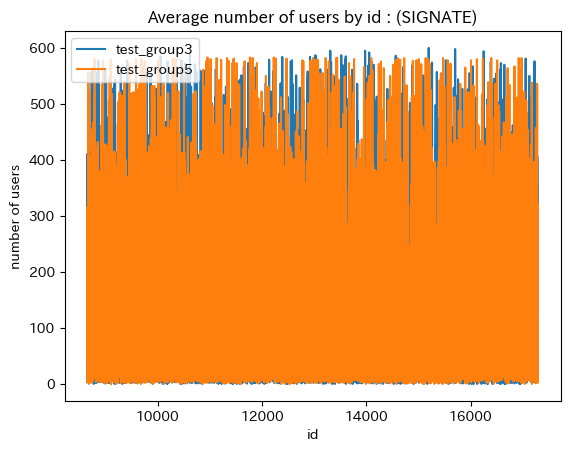

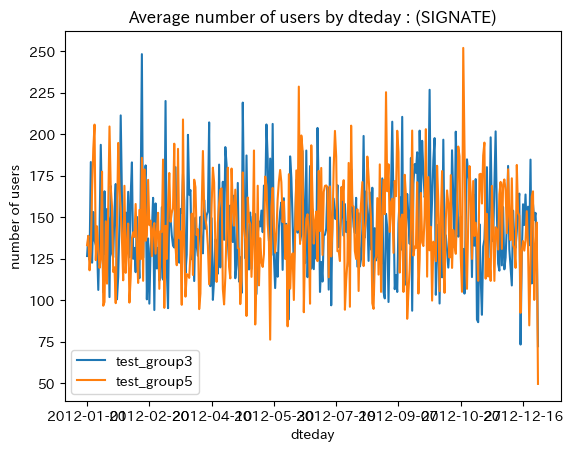

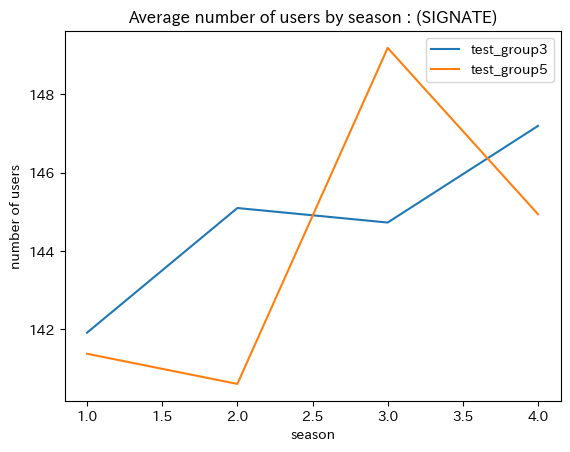

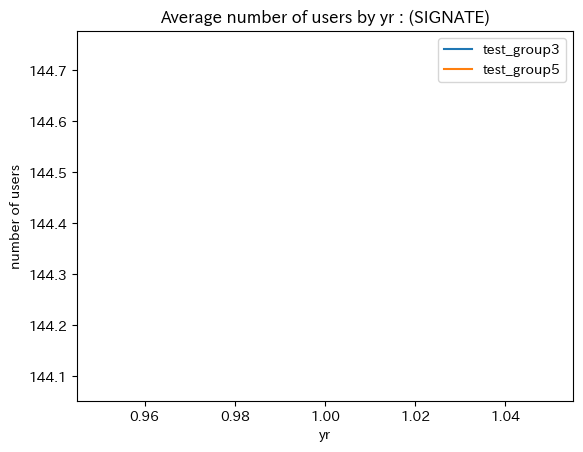

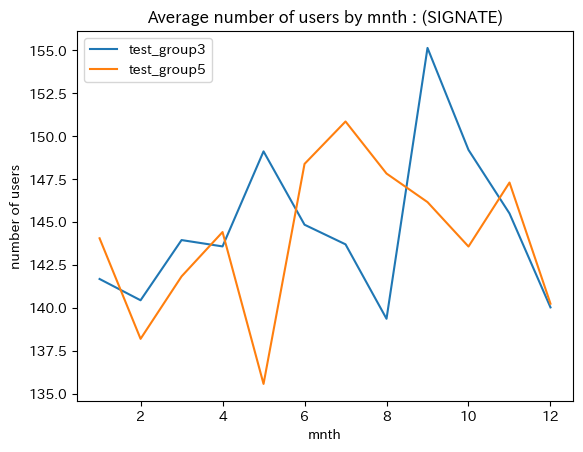

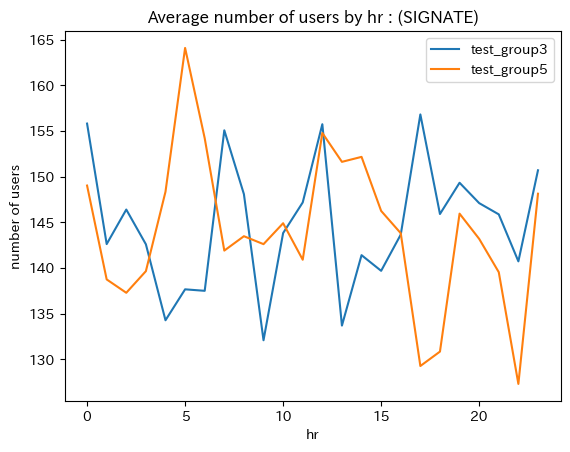

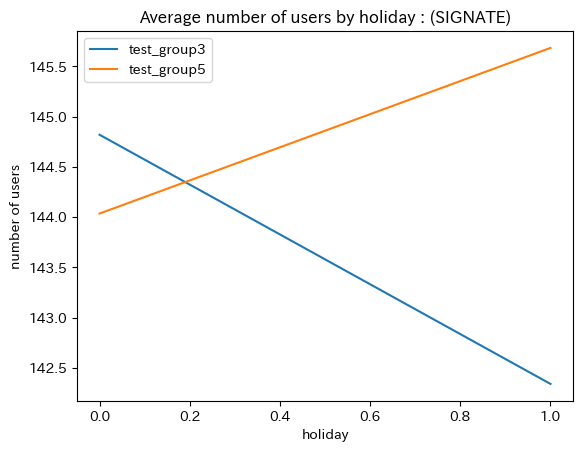

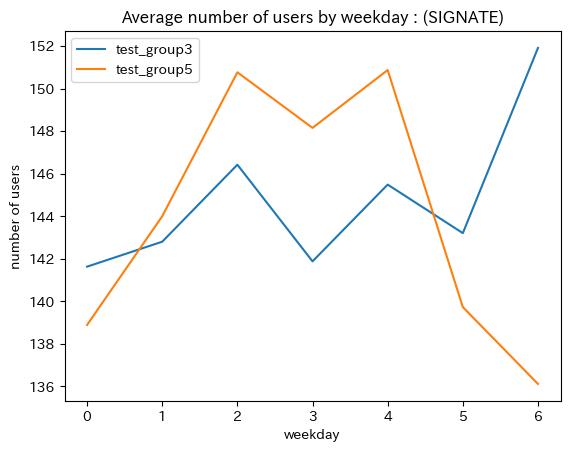

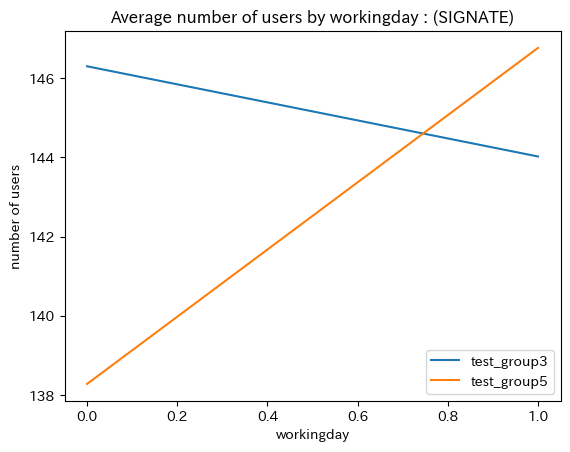

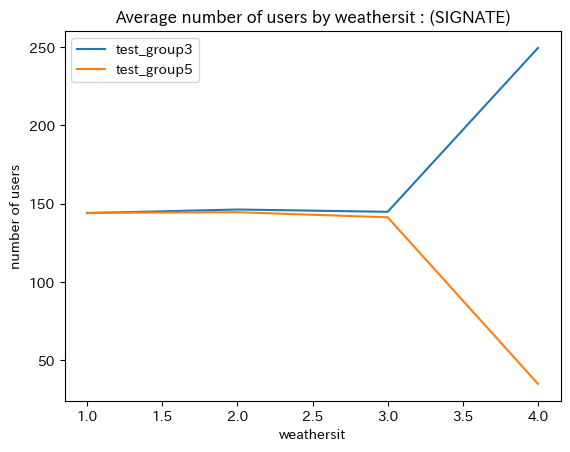

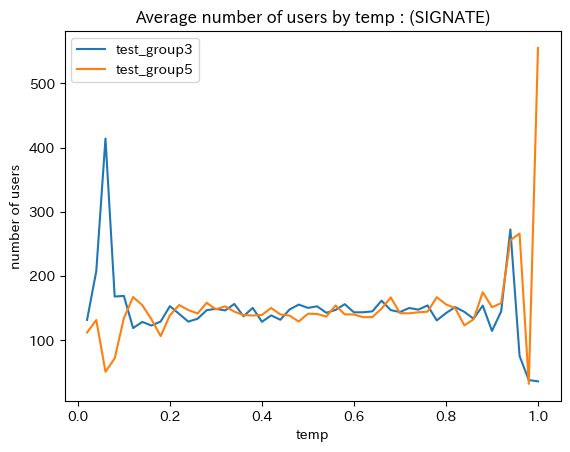

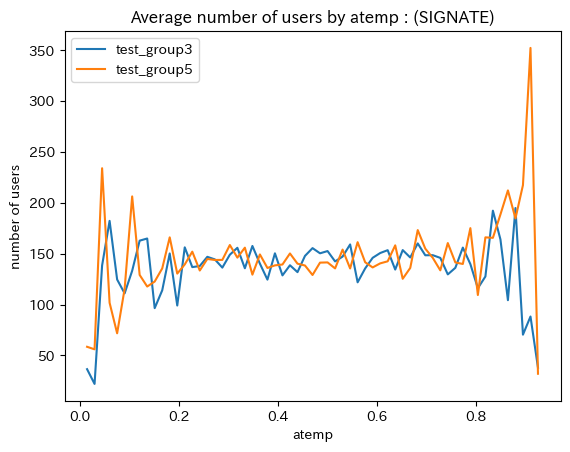

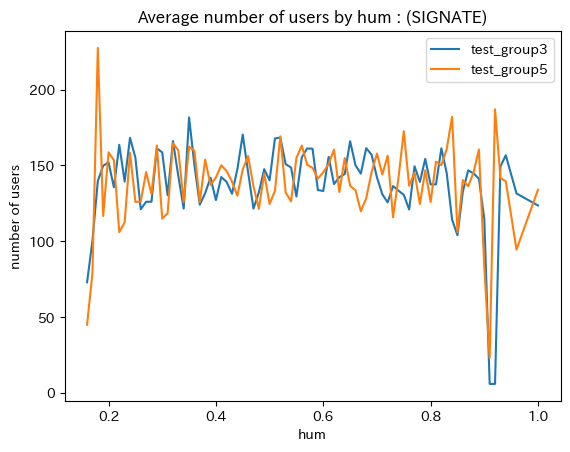

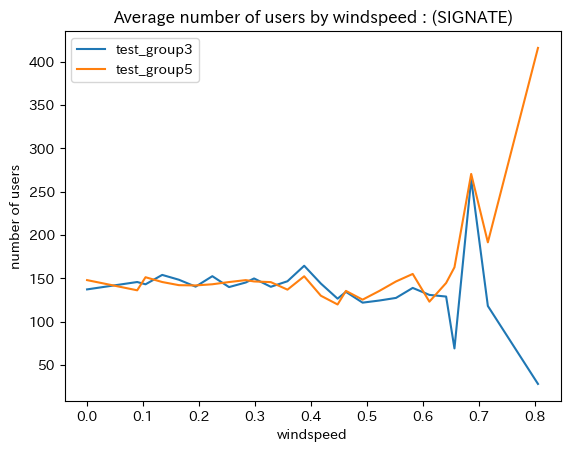

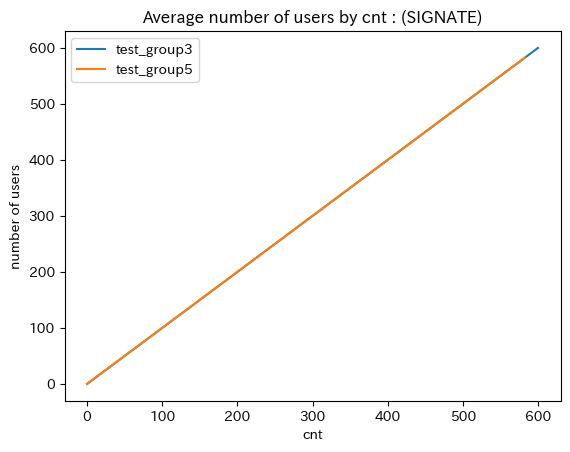

In [148]:
for i in range(len(header)):
  mk_graph_pra2cnt2(test_group3_df, "test_group3", test_group5_df, "test_group5", header[i], tag = "SIGNATE")

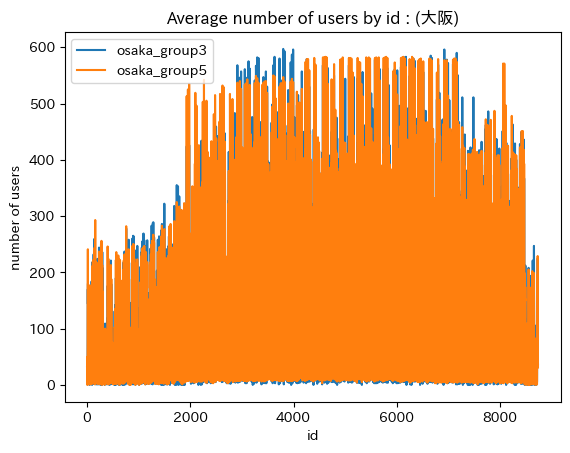

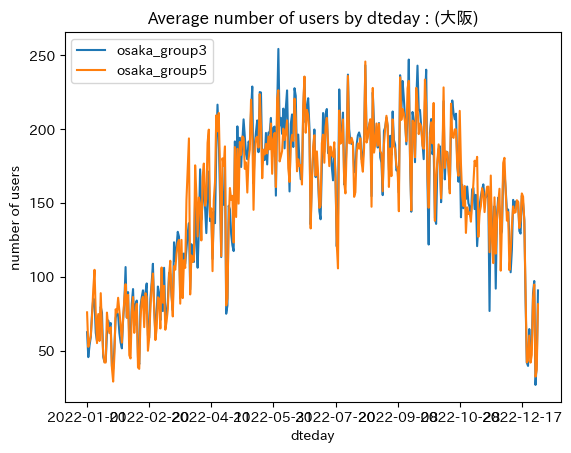

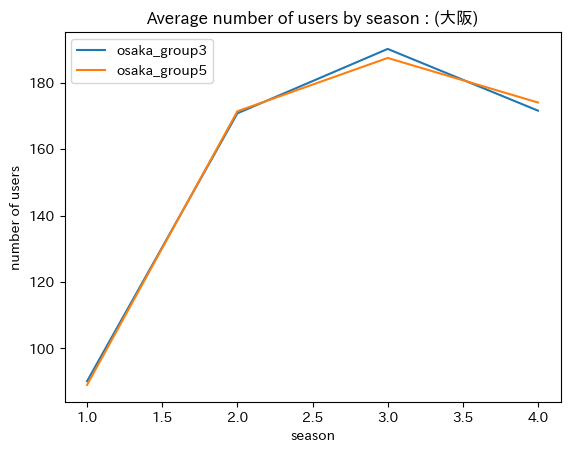

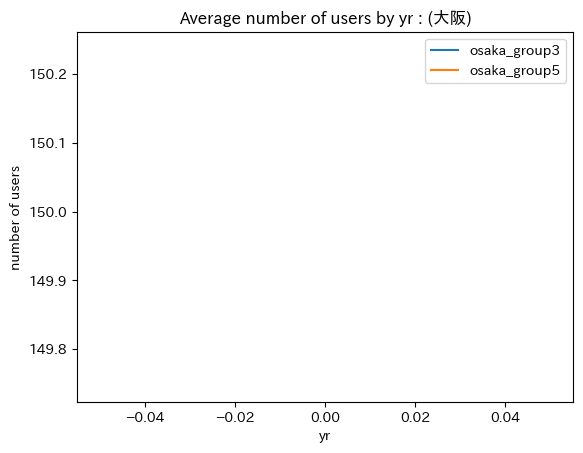

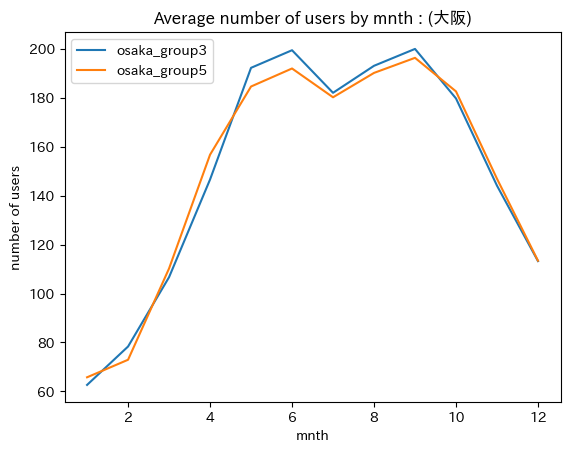

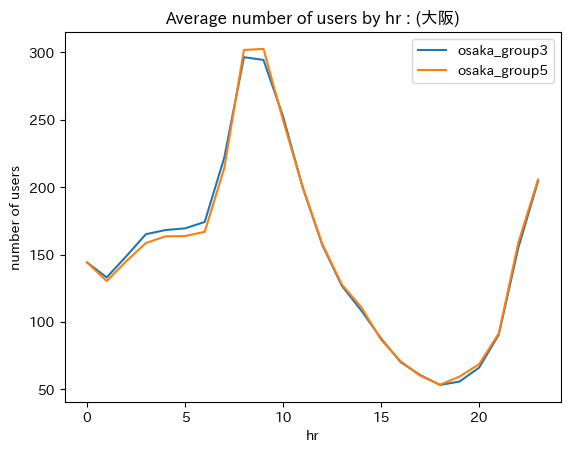

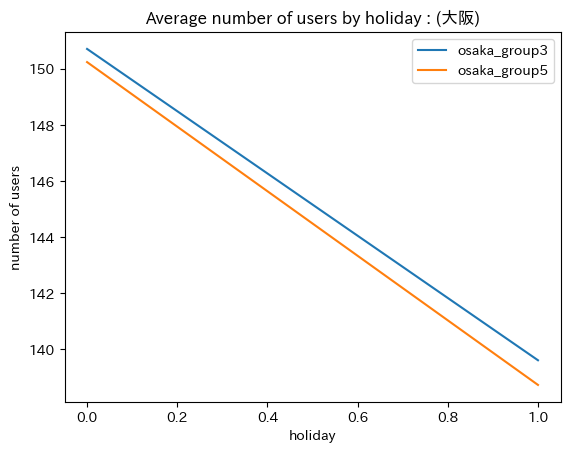

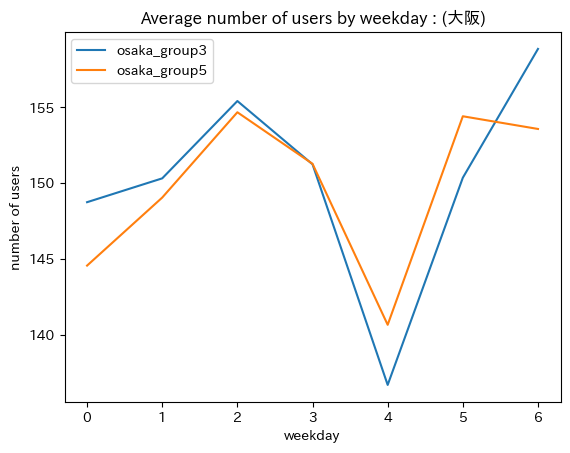

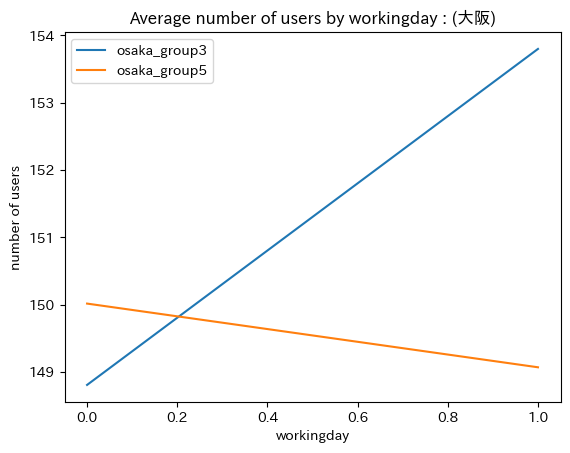

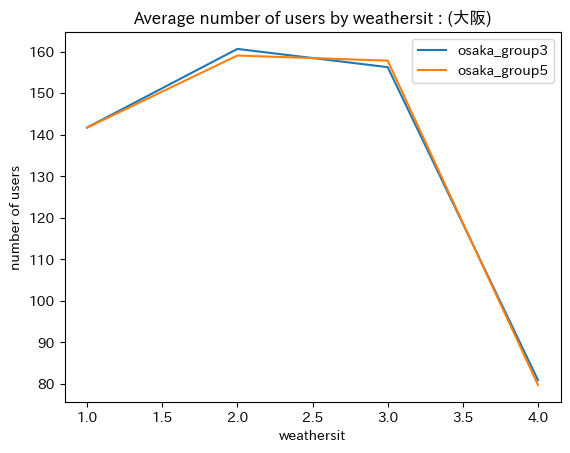

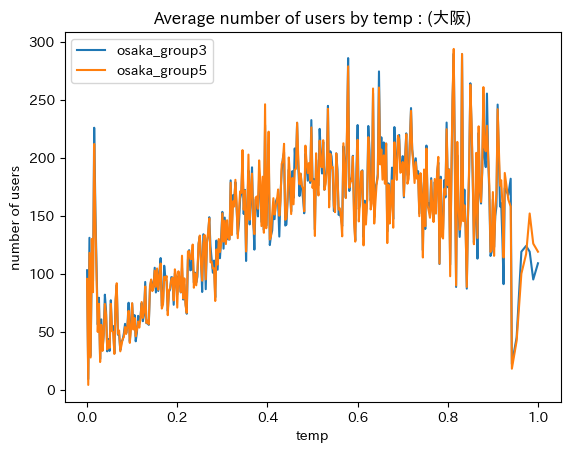

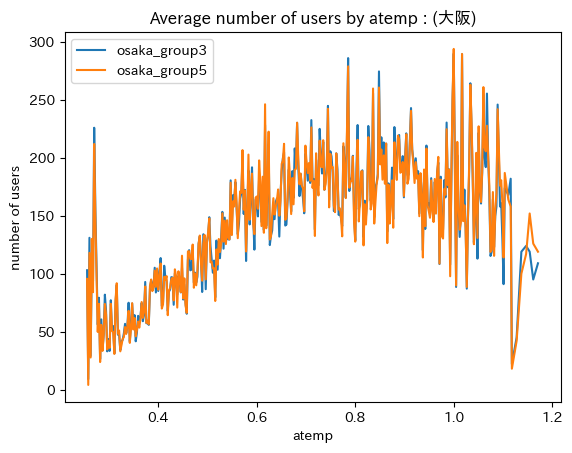

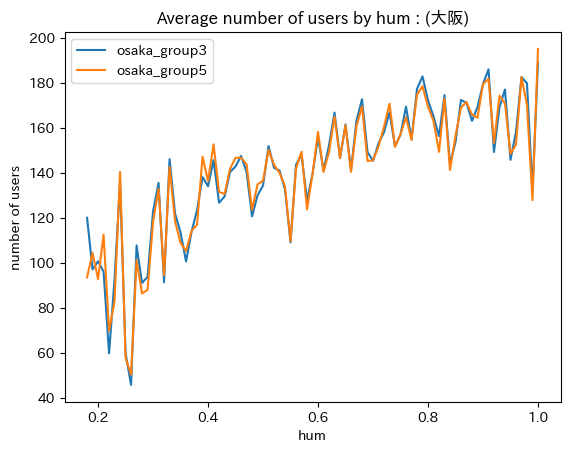

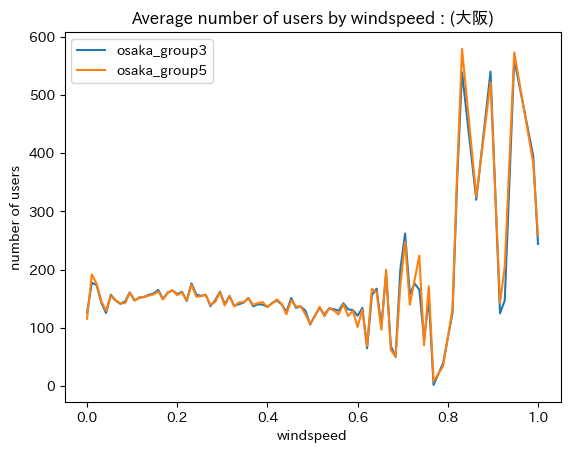

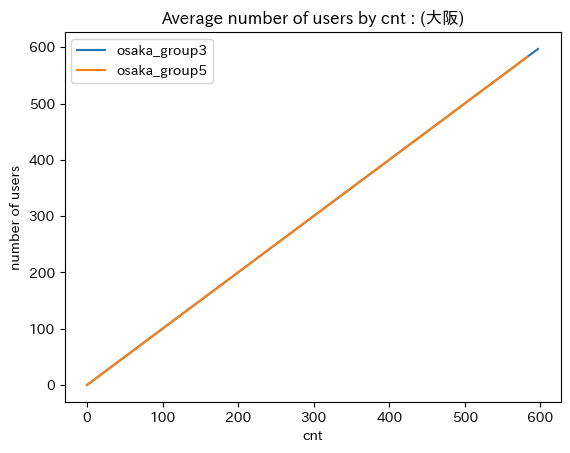

In [133]:
for i in range(len(header)):
  mk_graph_pra2cnt2(osaka_group3_df, "osaka_group3", osaka_group5_df, "osaka_group5", header[i], tag = "大阪")

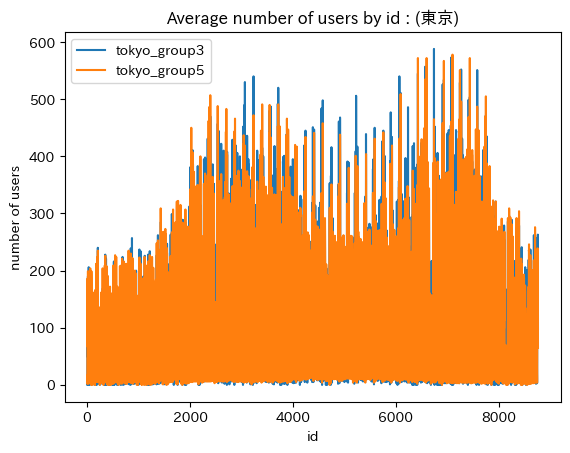

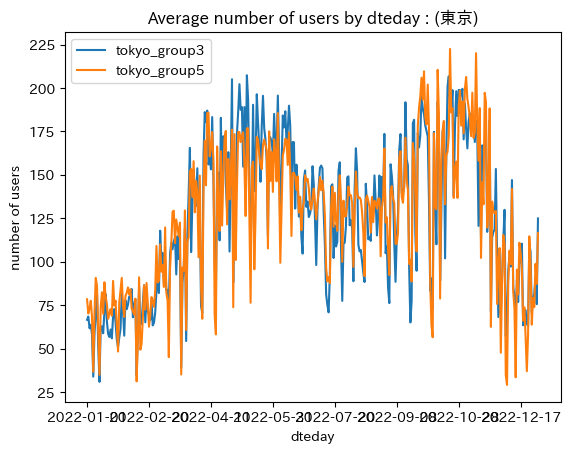

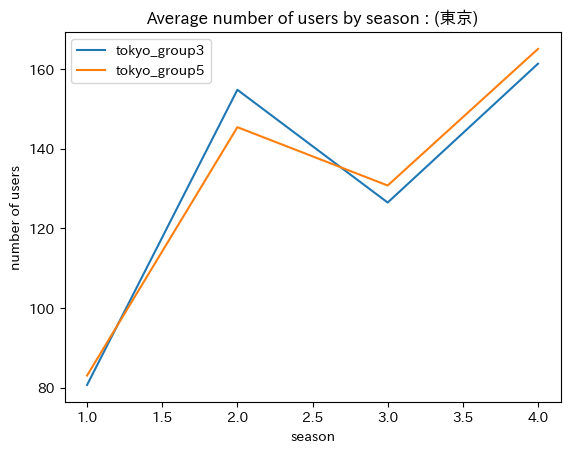

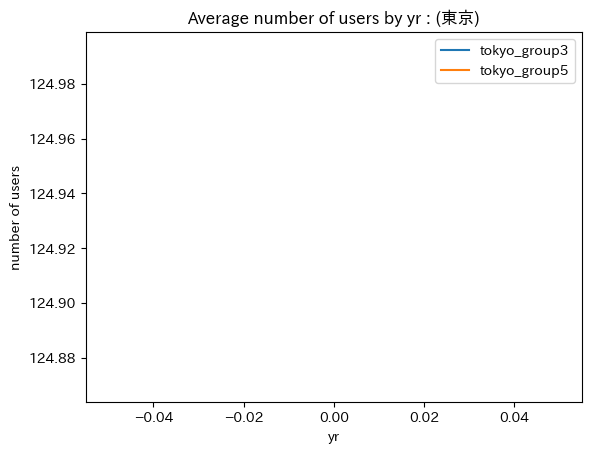

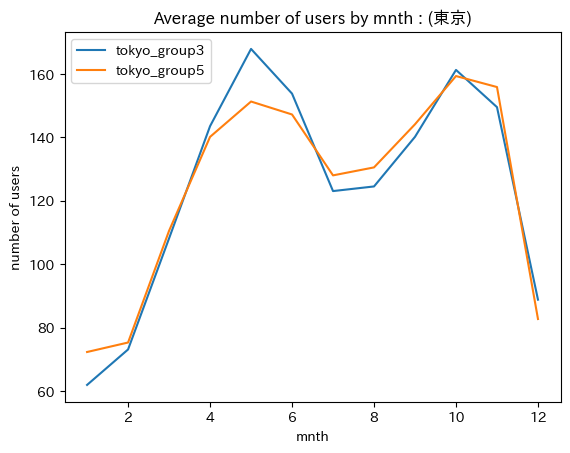

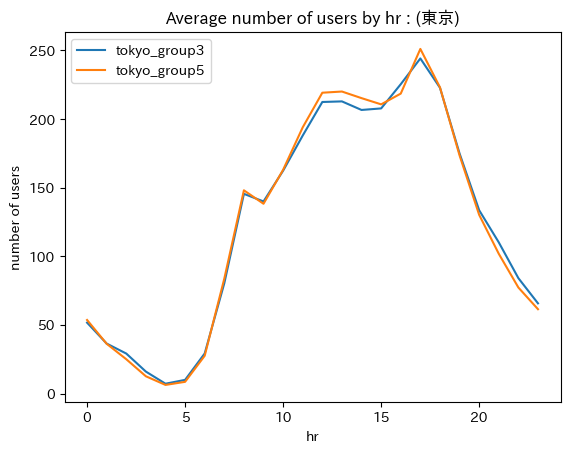

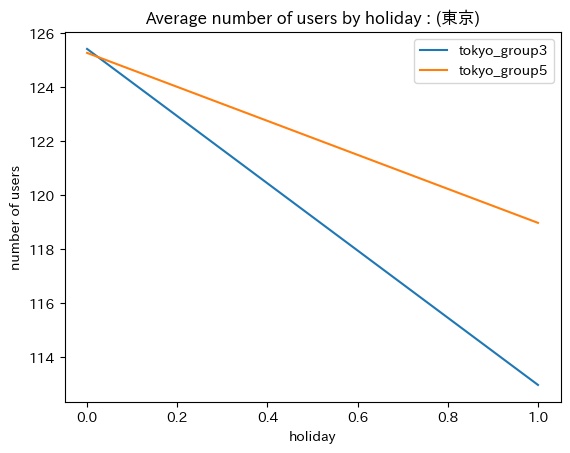

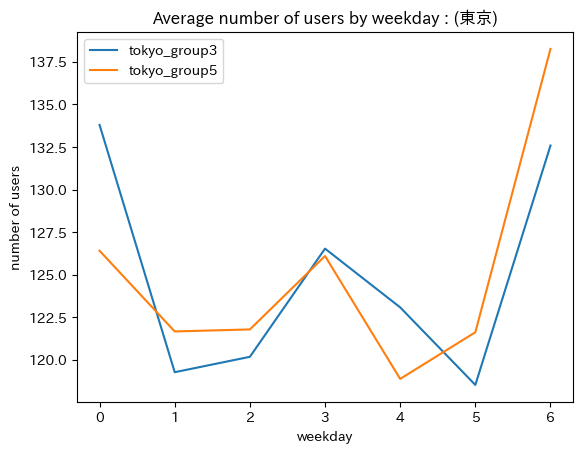

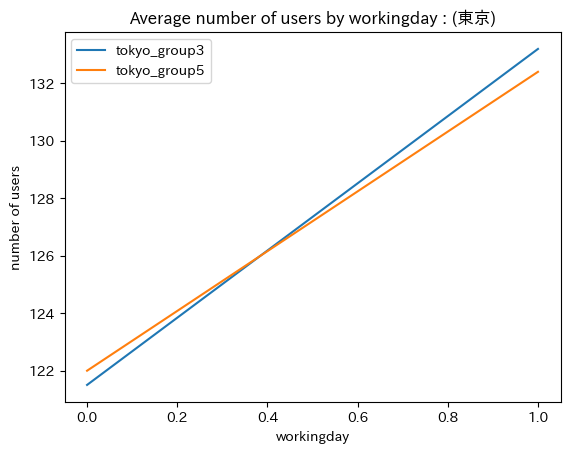

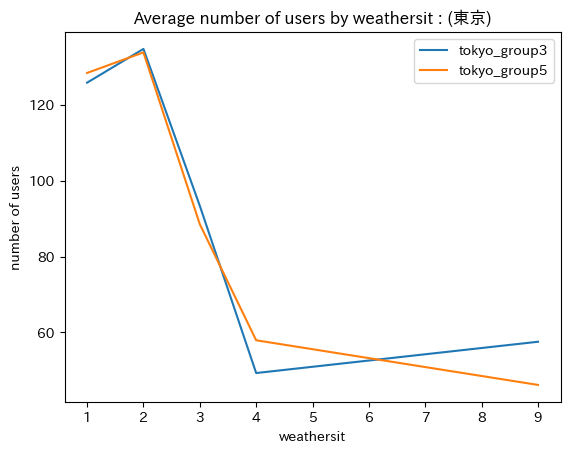

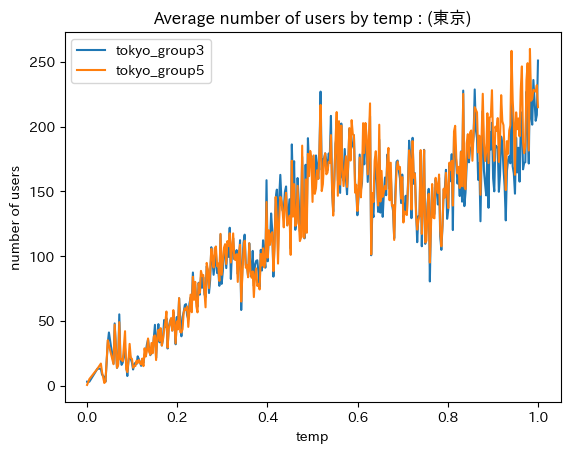

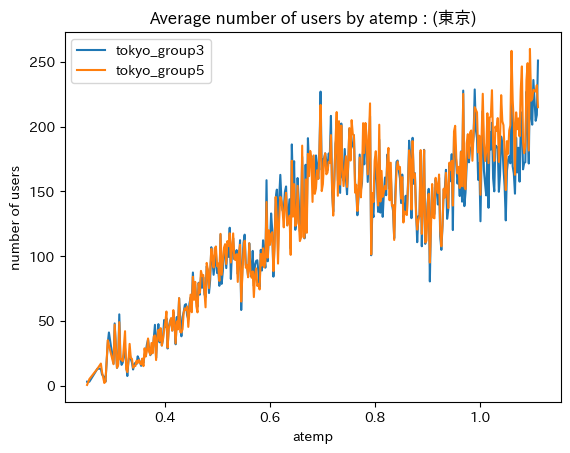

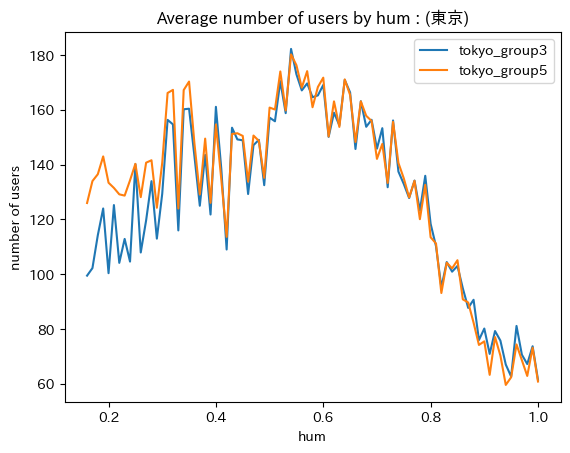

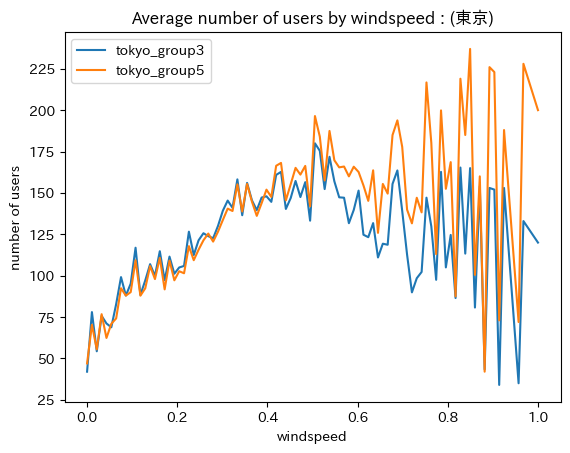

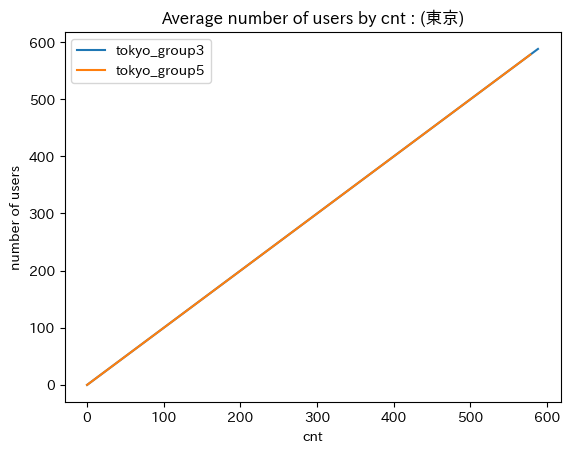

In [134]:
for i in range(len(header)):
  mk_graph_pra2cnt2(tokyo_group3_df, "tokyo_group3", tokyo_group5_df, "tokyo_group5", header[i], tag = "東京")

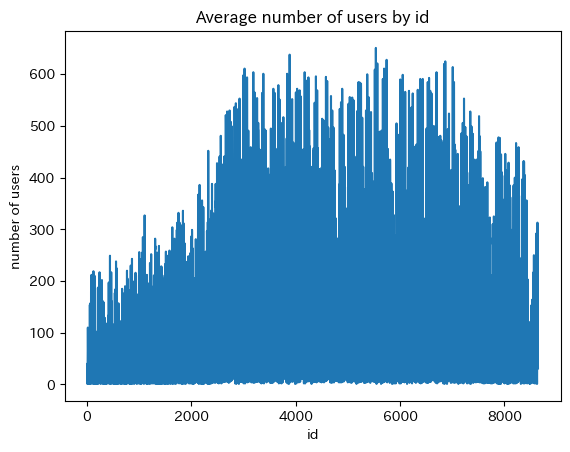

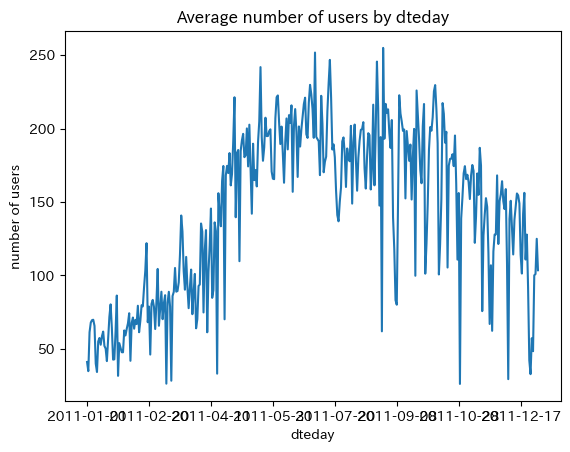

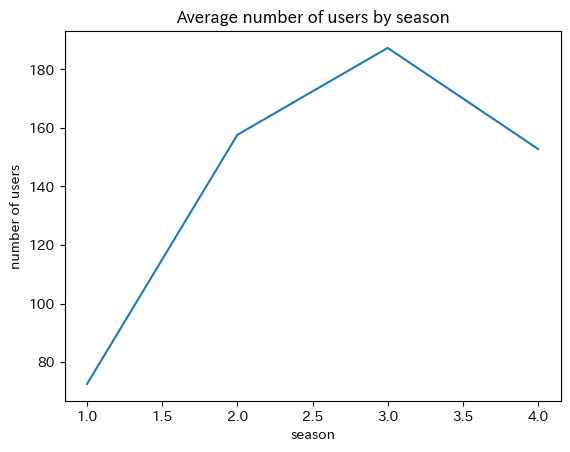

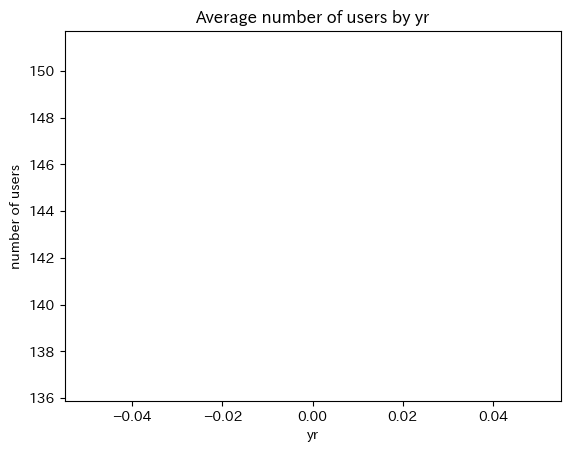

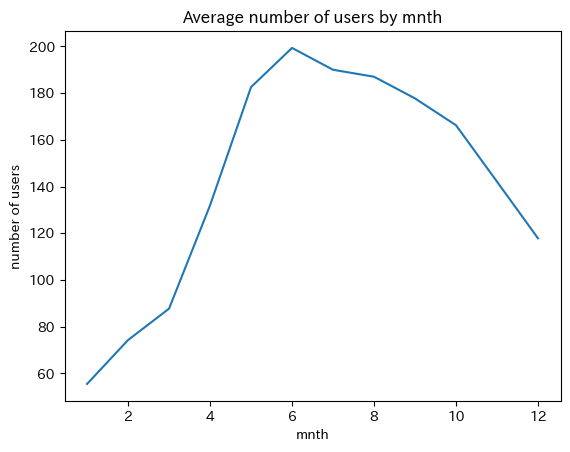

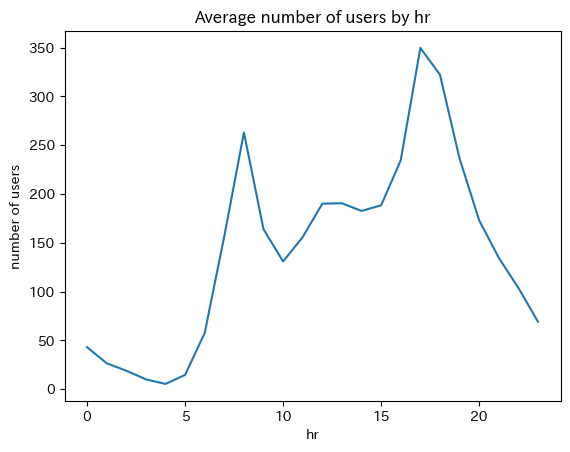

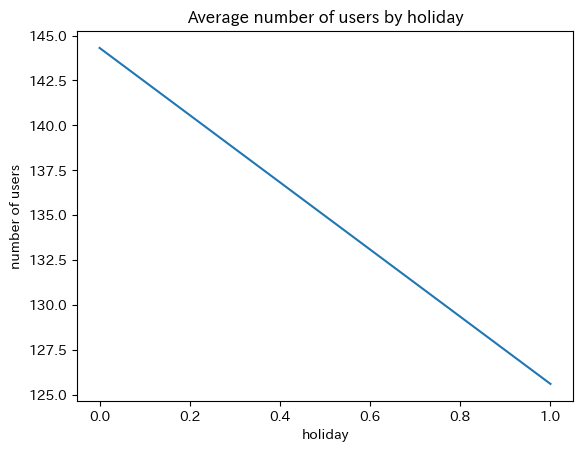

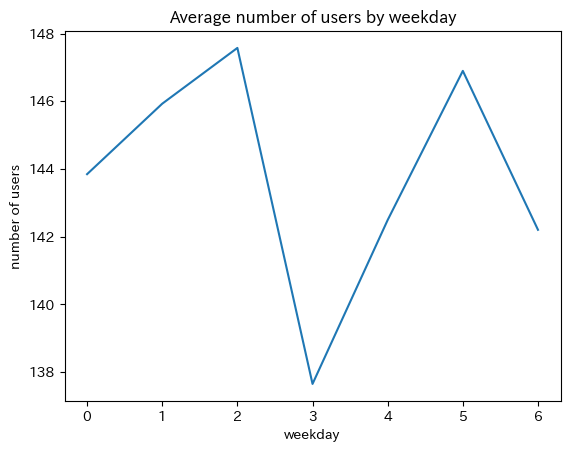

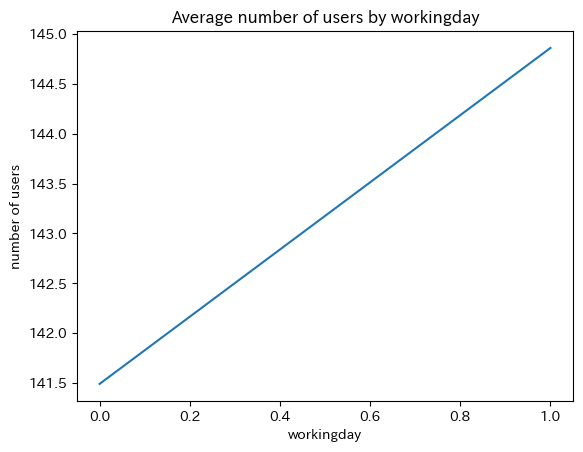

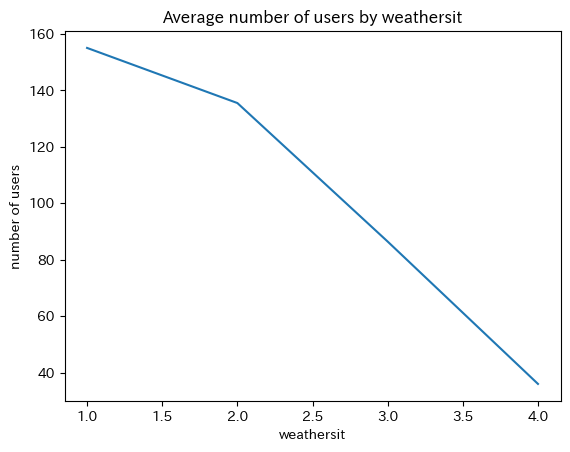

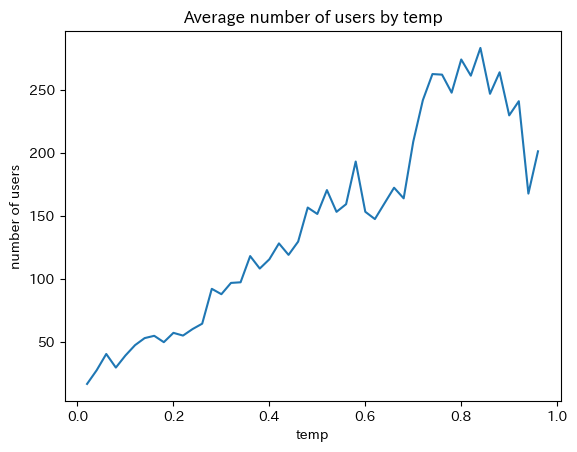

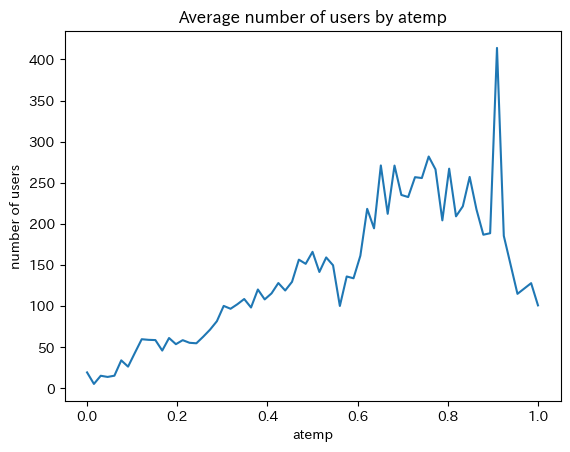

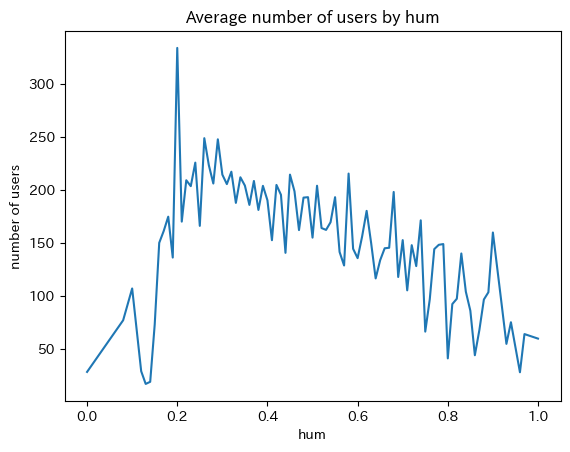

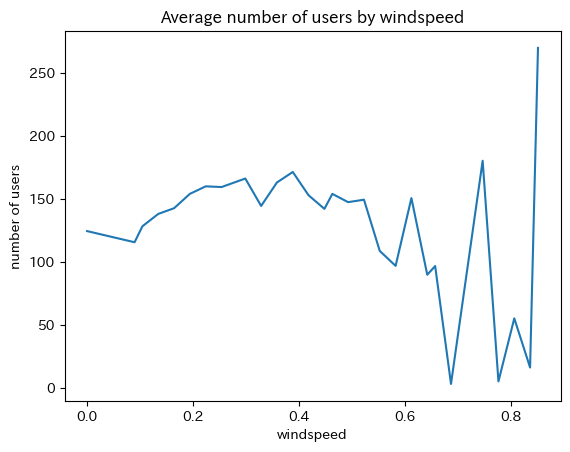

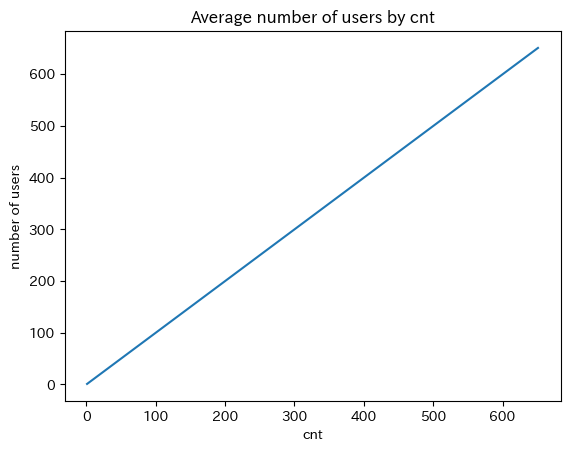

In [178]:
for i in range(len(header)):
  mk_graph_pra2cnt(train_df, header[i])

In [137]:
test_group3_df

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,3.0
1,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,7.0
2,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,107.0
3,8649,2012-01-01,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,18.0
4,8650,2012-01-01,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,NaN
8730,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,NaN
8731,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,NaN
8732,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,NaN


In [136]:
tokyo_group3_df

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2022-01-01,1.0,0,1,0,1.0,6.0,1.0,1,0.096939,0.334248,0.40,0.516129,5
1,2,2022-01-01,1.0,0,1,1,1.0,6.0,1.0,1,0.091837,0.329867,0.41,0.397849,0
2,3,2022-01-01,1.0,0,1,2,1.0,6.0,1.0,1,0.091837,0.329867,0.40,0.376344,0
3,4,2022-01-01,1.0,0,1,3,1.0,6.0,1.0,1,0.086735,0.325486,0.41,0.344086,1
4,5,2022-01-01,1.0,0,1,4,1.0,6.0,1.0,1,0.073980,0.314533,0.43,0.344086,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,8754,2022-12-31,1.0,0,12,17,0.0,6.0,1.0,1,0.216837,0.437207,0.68,0.193548,257
8753,8755,2022-12-31,1.0,0,12,18,0.0,6.0,1.0,1,0.211735,0.432826,0.71,0.172043,263
8754,8756,2022-12-31,1.0,0,12,19,0.0,6.0,1.0,1,0.224490,0.443779,0.69,0.150538,151
8755,8757,2022-12-31,1.0,0,12,20,0.0,6.0,1.0,1,0.204082,0.426254,0.74,0.107527,114


In [167]:
def mk_graph_pra2cnt3(data_frame1, data_frame1_name, data_frame2, data_frame2_name, param_name, tag = None):
  if os.path.exists(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}") == False:
    os.mkdir(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}")
  ax = data_frame1.groupby(param_name)["cnt"].mean().plot(label=data_frame1_name, kind="bar", color="#ff0000", alpha=0.5)
  data_frame2.groupby(param_name)["cnt"].mean().plot(label=data_frame2_name, kind="bar", color="#0000ff", alpha=0.1)
  ax.set_title(f"Average number of users by {param_name} : ({tag})")
  ax.set_xlabel(param_name)
  ax.set_ylabel("number of users")
  ax.legend()
  # plt.savefig(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}/cnt_{param_name}_{tag}.png")
  plt.show()
  ax.cla()

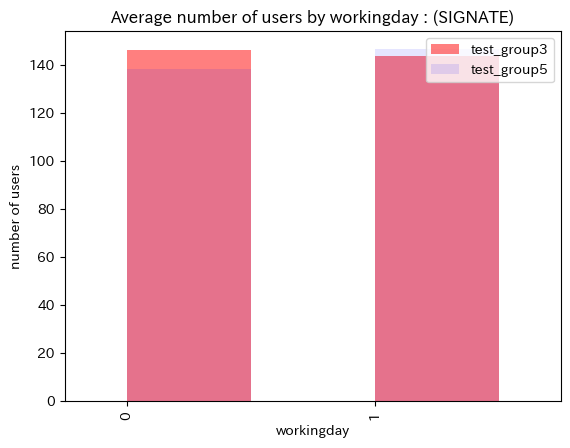

In [168]:
mk_graph_pra2cnt3(test_group3_df, "test_group3", test_group5_df, "test_group5", "workingday", tag = "SIGNATE")

In [ ]:
for i in range(len(header)):
  mk_graph_pra2cnt3(test_group3_df, "test_group3", test_group5_df, "test_group5", header[i], tag = "SIGNATE")

In [ ]:
for i in range(len(header)):
  mk_graph_pra2cnt3(osaka_group3_df, "osaka_group3", osaka_group5_df, "osaka_group5", header[i], tag = "大阪")

In [ ]:
for i in range(len(header)):
  mk_graph_pra2cnt3(tokyo_group3_df, "tokyo_group3", tokyo_group5_df, "tokyo_group5", header[i], tag = "東京")

In [169]:
# group3_bias
g3b = np.array([[22.17 / 4],  #季節を正規化
                [17.93 / 12], #月を正規化
                [40.75 / 23], #時間を正規化
                [-0.04 / 6.0],   #曜日を正規化
                [14.33 / 4.0],   #天気を正規化
                [-2.29],
                [1.17],
                [45.12],
                [44.70],
                [-28.86],
                [8.54]])

In [170]:
# group5_bias
g5b = np.array([[2.7 / 4],   #季節を正規化
                [1.8 / 12], #月を正規化
                [62.3 / 23], #時間を正規化
                [1.4 / 6.0],   #曜日を正規化
                [2.2 / 4.0],   #天気を正規化
                [0.2],
                [5.6],
                [9.5],
                [8.9],
                [3.4],
                [1.5]])

In [174]:
np.set_printoptions(suppress=True, precision=8)
print(f"group3_bias = {list(g3b.reshape(-1))}")
print(f"group5_bias = {list(g5b.reshape(-1))}")

group3_bias = [5.5425, 1.4941666666666666, 1.7717391304347827, -0.006666666666666667, 3.5825, -2.29, 1.17, 45.12, 44.7, -28.86, 8.54]
group5_bias = [0.675, 0.15, 2.7086956521739127, 0.2333333333333333, 0.55, 0.2, 5.6, 9.5, 8.9, 3.4, 1.5]
